In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [4]:
from sklearn import linear_model

In [5]:
!mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/


In [7]:
data=pd.read_csv('Telco-Customer-Churn.csv')

In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.loc[data.Churn=='No','Churn'] = 0 
data.loc[data.Churn=='Yes','Churn'] = 1

In [12]:
plot = data.groupby('gender').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['gender'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [13]:
data.groupby('gender').Churn.mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

In [14]:
plot = data.groupby('InternetService').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['InternetService'],
        y=plot['Churn'],
        width = [0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue','orange'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Internet Service',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [15]:
plot = data.groupby('Contract').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['Contract'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue','orange'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Contract',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [16]:
plot = data.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['TechSupport'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue','orange'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Tech Support',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [17]:
plot = data.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['PaymentMethod'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='PaymentMethod',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [18]:
plot = data.groupby('PaperlessBilling').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['PaperlessBilling'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='PaperlessBilling',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [19]:
plot = data.groupby('StreamingMovies').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['StreamingMovies'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue','orange'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='StreamingMovies',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [20]:
plot = data.groupby('DeviceProtection').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['DeviceProtection'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='DeviceProtection',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [21]:
plot = data.groupby('PhoneService').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['PhoneService'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='PhoneService',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [22]:
plot = data.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot['tenure'],
        y=plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Tenure based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [23]:
plot = data.groupby('MonthlyCharges').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot['MonthlyCharges'],
        y=plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Monthly Charges"},
        title='Monthly Charge based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [24]:
plot = data.groupby('TotalCharges').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot['TotalCharges'],
        y=plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Total Charges"},
        title='Total Charge based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [25]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [26]:
y_predicted=km.fit_predict(data[['tenure']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 2, 1, ..., 1, 1, 0], dtype=int32)

In [27]:
data['cluster']=y_predicted
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


In [28]:
data.groupby('cluster').tenure.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2239.0,63.048682,7.478229,49.0,56.0,64.0,70.0,72.0
1,2878.0,7.512509,5.977337,0.0,2.0,6.0,12.0,20.0
2,1926.0,33.854102,8.208706,21.0,26.0,34.0,41.0,48.0


In [29]:
plot = data.groupby('cluster').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['cluster'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue','orange'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Tenure cluster VS churn rate',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [30]:
km1 = KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[['MonthlyCharges']])
data['MonthlyChargesCluster']=y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [31]:
data.groupby('MonthlyChargesCluster').MonthlyCharges.describe()

,count,mean,std,min,25%,50%,75%,max
MonthlyChargesCluster,,,,,,,,
0,2241.0,61.643284,10.448008,42.60,51.8,61.55,70.7000,77.85
1,2910.0,94.065395,10.338766,77.90,85.1,93.90,101.9375,118.75
2,1892.0,23.384619,5.660437,18.25,19.8,20.40,25.0500,42.40


In [32]:
plot = data.groupby('MonthlyChargesCluster').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot['MonthlyChargesCluster'],
        y=plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue','orange'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Monthly Charges cluster VS churn rate',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [33]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns
for column in data.columns:
    if data[column].dtype == object and column != 'customerID':
        if data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            data[column] = le.fit_transform(data[column]) 
        else:
            dummy_columns.append(column)
#apply get dummies for selected columns
data = pd.get_dummies(data = data,columns = dummy_columns)

In [34]:
data[['gender','Partner','cluster']].head()

,gender,Partner,cluster
0,0,1,1
1,1,0,2
2,1,0,1
3,1,0,2
4,0,0,1


In [35]:
reg=linear_model.LinearRegression()
reg.fit(data[['tenure']],data.Churn)

LinearRegression()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
X = data.drop(['Churn','customerID'],axis=1)
y = data.Churn
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)
model=LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test[X_train.columns],y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8106128550074738
0.8385269121813032


In [38]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.91      0.90       267
           1       0.69      0.60      0.65        86

    accuracy                           0.84       353
   macro avg       0.79      0.76      0.77       353
weighted avg       0.83      0.84      0.83       353



<function matplotlib.pyplot.show(close=None, block=None)>

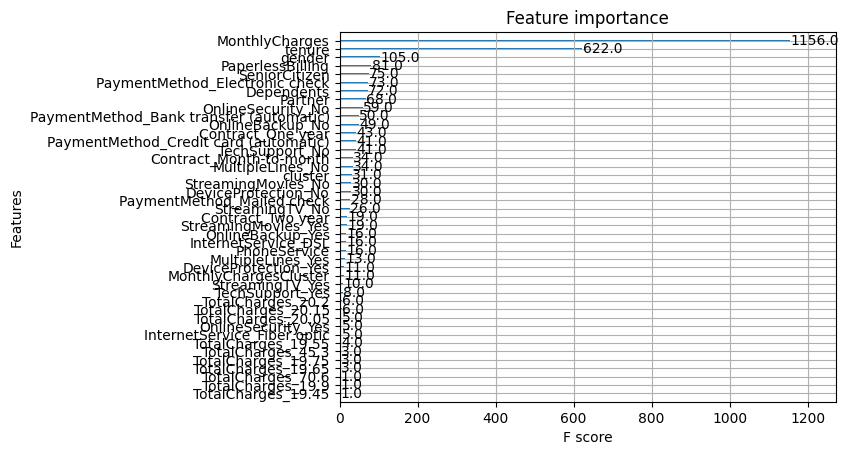

In [ ]:
from xgboost import XGBClassifier, plot_importance

model=XGBClassifier()
model.fit(X_train,y_train)
plot_importance(model)

In [ ]:
data['proba']=model.predict_proba(data[X_train.columns])[:,1]

In [ ]:
data[['customerID','proba']].head()

,customerID,proba
0,7590-VHVEG,0.524645
1,5575-GNVDE,0.056456
2,3668-QPYBK,0.317559
3,7795-CFOCW,0.043874
4,9237-HQITU,0.700315
